In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")

In [14]:
multithreading = pd.read_csv('../results-multithreading.csv')
multiprocessing = pd.read_csv('../results-multiprocessing.csv')

In [15]:
multithreading

,File Count,Size,Avg. Time
0,48,41472,0.356098
1,32,62208,0.276325
2,16,124416,0.291677
3,12,165888,0.264565
4,8,248832,0.305133
...,...,...,...
275,16,124416,0.393985
276,12,165888,0.102966
277,8,248832,0.207458
278,4,497664,0.322301


Text(0, 0.5, 'Avg. Time (s)')

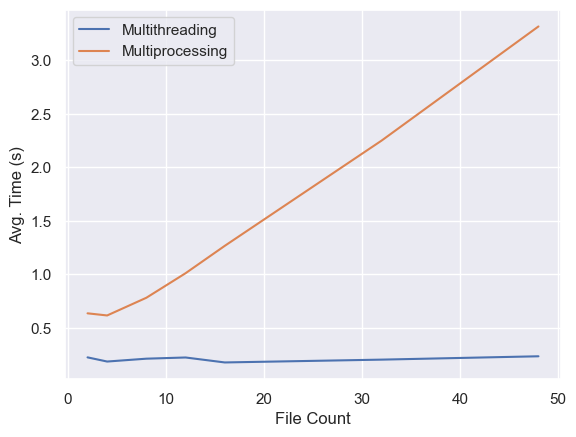

In [20]:
plt.plot(multithreading.groupby("Size").mean()["File Count"], multithreading.groupby("Size").mean()["Avg. Time"], label='Multithreading')
plt.plot(multiprocessing.groupby("Size").mean()["File Count"], multiprocessing.groupby("Size").mean()["Avg. Time"], label='Multiprocessing')
plt.legend()
plt.xlabel('File Count')
plt.ylabel('Avg. Time (s)')

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
multiprocessing['Tratamiento'] = 'multiprocessing'

multithreading['Tratamiento'] = 'multithreading'
combined_df = pd.concat([multiprocessing, multithreading], ignore_index=True)

In [8]:
# Rename column Avg. Time to Resultado
combined_df = combined_df.rename(columns={'Avg. Time': 'Resultado'})

In [9]:
modelo = ols('Resultado ~ C(Tratamiento)', data=combined_df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [21]:
combined_df.to_csv('anova.csv')

In [11]:
anova_table

,sum_sq,df,F,PR(>F)
C(Tratamiento),202.358518,1.0,447.732571,2.096616e-73
Residual,252.195307,558.0,NaN,NaN


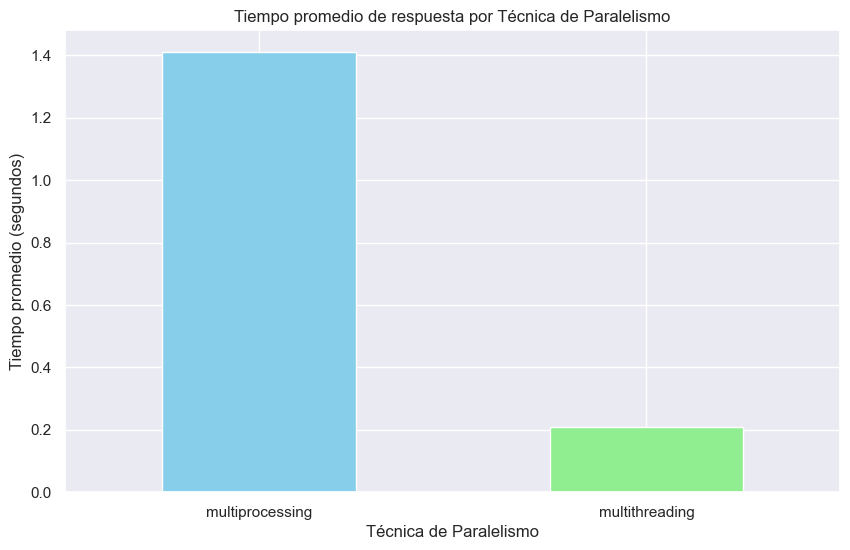

In [22]:

plt.figure(figsize=(10,6))
combined_df.groupby('Tratamiento')['Resultado'].mean().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Tiempo promedio de respuesta por Técnica de Paralelismo')
plt.ylabel('Tiempo promedio (segundos)')
plt.xlabel('Técnica de Paralelismo')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
